# Flare 2013/06/30



In [1]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi as un
#

In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
import matplotlib.cm as cm


In [3]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

from astropy.io import fits as f
# And now the running commands
openfile="crispex_6563_09_15_50_time_corrected.fits"
# datacube6563=f.getdata(openfile)
header= f.getheader(un.get_file_path_fits(openfile))
print(header)
# np.savetxt('headerHa13.txt', header)

tseries = rs('tseries_6563_09_15_50_calib.sav')
tseries.keys(), tseries, np.shape(tseries['grid'])

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                   16 / array data type                                NAXIS   =                    5 / number of array dimensions                     NAXIS1  =                  964                                                  NAXIS2  =                  970                                                  NAXIS3  =                   33                                                  NAXIS4  =                    1                                                  NAXIS5  =                  504                                                  EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                     

(dict_keys(['tstep', 'clip', 'tile', 'scale', 'ang', 'shift', 'grid', 'time', 'date', 'wfiles', 'tmean', 'crop']),
 {'tstep': 25,
  'clip': array([12,  4,  2,  1], dtype='>i2'),
  'tile': array([ 6,  8,  8, 14], dtype='>i2'),
  'scale': 16.891891,
  'ang': array([ 0.0450829 ,  0.04491455,  0.04472284,  0.04441143,  0.04412924,
          0.04395316,  0.04378447,  0.04361573,  0.04344692,  0.04327774,
          0.04310884,  0.04293924,  0.04277072,  0.04260107,  0.04243212,
          0.04226263,  0.04209345,  0.04192411,  0.04175389,  0.04158461,
          0.0414147 ,  0.04124294,  0.04107252,  0.04090292,  0.0407329 ,
          0.04056295,  0.04039231,  0.04022157,  0.04005058,  0.03987953,
          0.03970897,  0.03953885,  0.03936804,  0.03919701,  0.03902642,
          0.03885461,  0.03868327,  0.03851245,  0.0383409 ,  0.03816843,
          0.03799642,  0.03782507,  0.03765316,  0.03748148,  0.03730876,
          0.03713695,  0.03696484,  0.03679304,  0.03662083,  0.03644914,
     

In [4]:
tseries['ang'][0], tseries['ang'][0]*60**2

(0.04508289962217571, 162.29843863983257)

np.shape(self.datacube) (504, 1, 33, 970, 964)

(970, 964) (970, 964)
Boundary
Blue=Outside, yellow=Inside


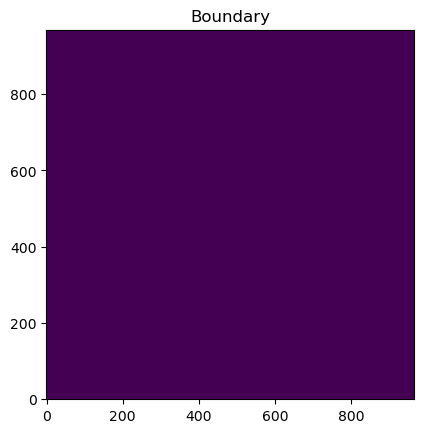

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


((504, 1, 33, 970, 964),
 array([[[10000, 10000, 11165,  9703],
         [ 9657,  9802,  9589, 11293]],
 
        [[ 8915,  8915,  9466,  9144],
         [ 8944,  8484,  8725,  9073]],
 
        [[ 5898,  5898,  5432,  6275],
         [ 6175,  5495,  4881,  6091]],
 
        [[ 4007,  4007,  2330,  3239],
         [ 2790,  2928,  2033,  3150]],
 
        [[ 4308,  4308,  2891,  3374],
         [ 2666,  3377,  2694,  3423]],
 
        [[ 7625,  7625,  7552,  7986],
         [ 6278,  6182,  7358,  7952]]], dtype='>i2'))

In [5]:
reload(un)
#  %matplotlib inline
Ha = un.SST_data(filename_fits='crispex_6563_09_15_50_time_corrected.fits',spectfilename='spectfile_6563.idlsave',
                 timesfilename='tseries_6563_09_15_50_calib.sav', name_of_line='Ha13', thresh=[1000, 50000], boundary_methode='No Boundary')

# Ha.datacube
np.shape(Ha.datacube), Ha.datacube[0,0,0:30:5,10:20:5, 100:200:30]


In [6]:
print(Ha._time[1], Ha._time[0], Ha._time[2], Ha._time[-1]) 
Ha.calculate__FOV_spect_over_time()

b'09:16:01.529' b'09:15:54.254' b'09:16:09.809' b'10:17:18.131'


In [7]:
np.max(Ha.datacube[0,0,:,:,:]), np.min(Ha.datacube[0,0,:,:,:])

(29596, 1775)

In [8]:
secs = un.get_TIME(Ha)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} for this line!")

the mean cadence is 7.324055666003973 for this line!


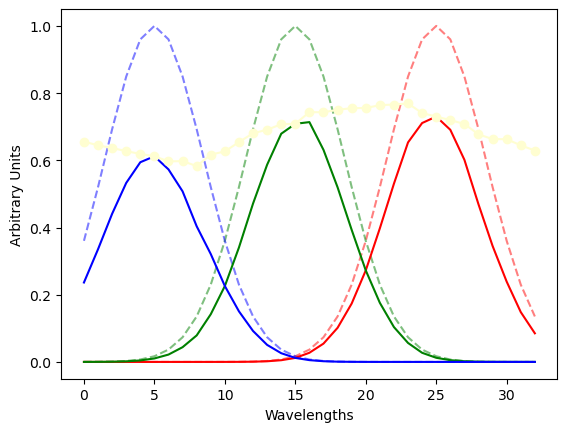

In [9]:
# %matplotlib inline
Ha.update_filters([[25,3.5], [15,3.5], [5,3.5]])
Ha.plot_filt(880,900)
plt.show()

In [10]:
# from cocoplot import RGB

# data_float = RGB(datacube, filter = Ha._filt, threshold=Ha._thresh, thresmethod='percentile')
# data_int = norm(data_float)
# np.uint8(np.round(data*255./np.max(data)))

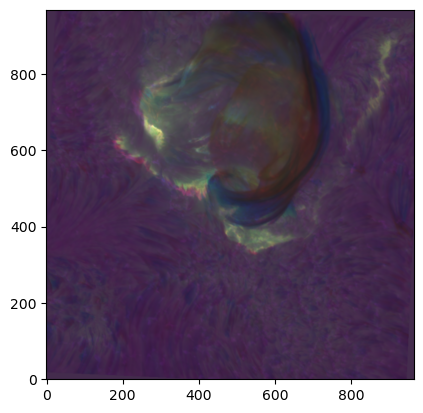

(970, 964, 3)


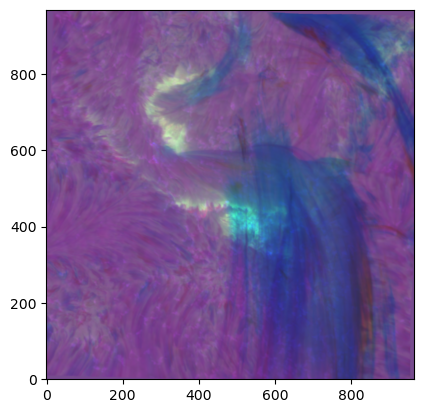

(970, 964, 3)


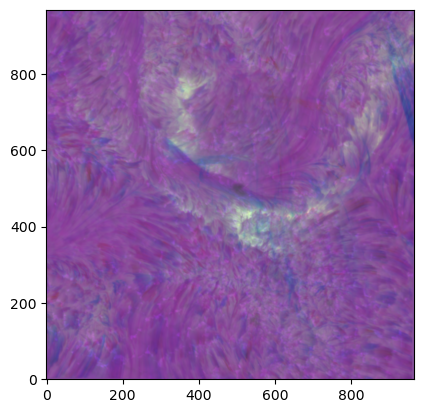

(970, 964, 3)


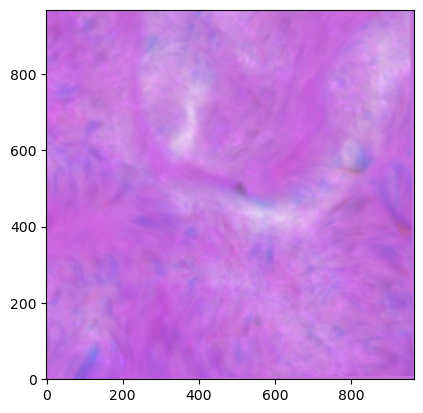

(970, 964, 3)


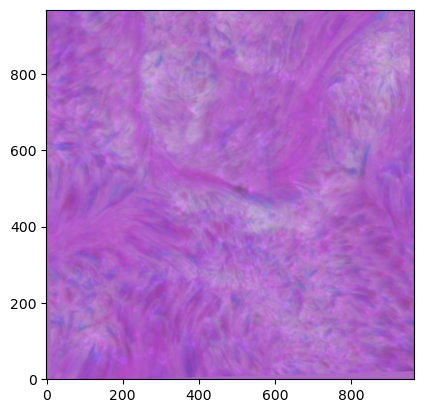

(970, 964, 3)


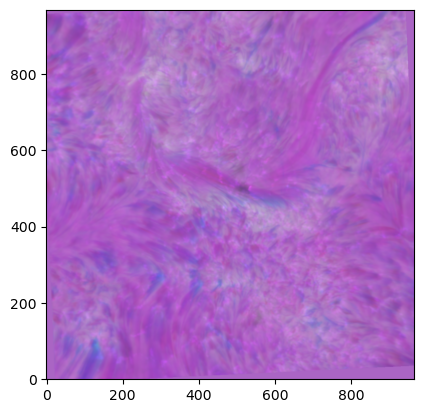

(970, 964, 3)


In [11]:
# %matplotlib widget
for frame in range(0,Ha._number_of_frames, 100):
    # frame=0
    Ha.ccp_frame(frame,Show=False)
    plt.imshow(Ha.current_ccp, origin='lower')

    # plt.imshow(Ha.boundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(Ha.current_ccp))#,np.shape(Ha.boundary))

In [12]:
Ha.boundary

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

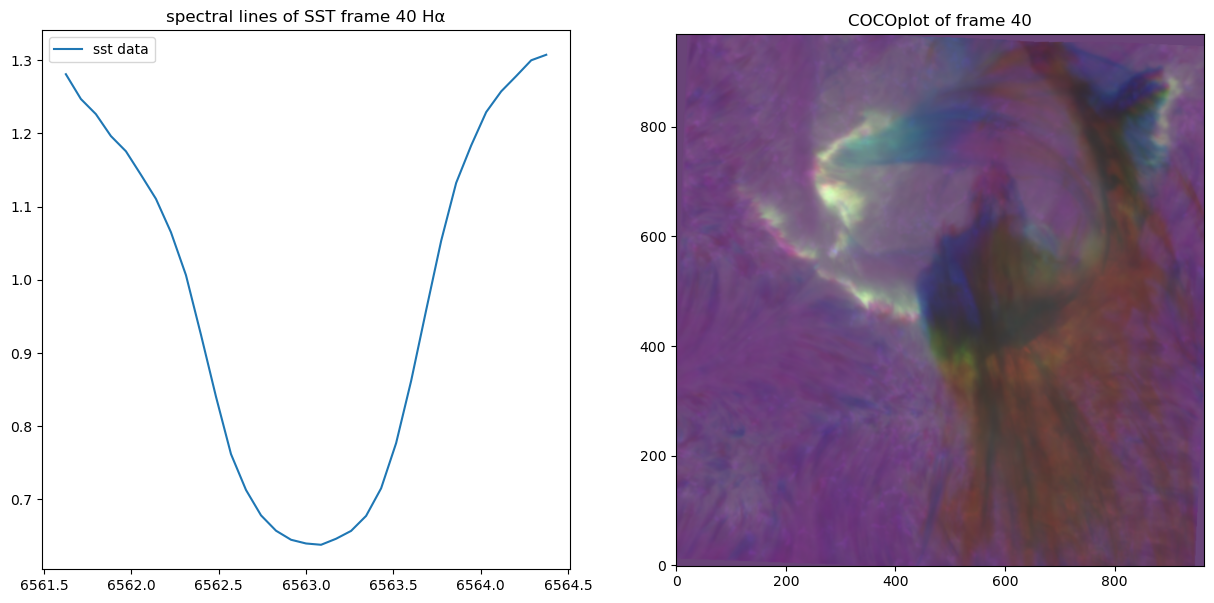

In [13]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 40
Ha.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
Ha.frame_integrated_spect(frame)
ax[0].plot(Ha._wavel, Ha.av_spect, label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(Ha.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

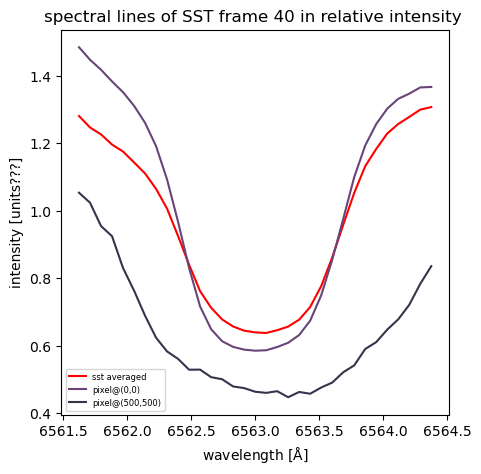

In [14]:
Ha.current_ccp[0:30:10,0:60:20,:]
Ha.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

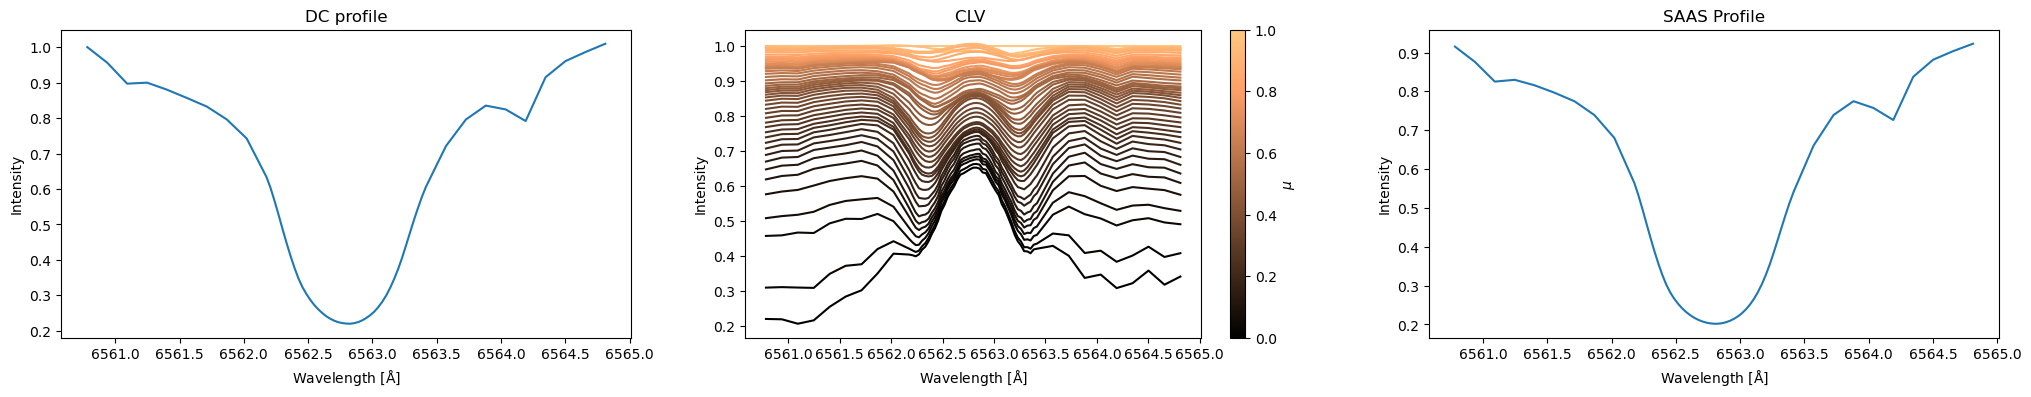

6562.797056366136 6562.797056366135


In [11]:
import use_nessi3 as un3
theor_Ha = un3.linestudier('E:/solar flares/data/2017-09-06/fits/6563_clv.fits', atlas=None, nr=101)
print(np.median(theor_Ha.sst_wav), np.mean(theor_Ha.sst_wav))

## Calculating the $\mu$ !!!!! 

FOV centered around $(323.4'',  -287.9'')$ which gives a $\mu = \sqrt{1- (323.4''^2  +-287.9''^2 ) / 959.63''^2 } = 0.892 $

Here is the field of $55 \times 55 $ as said in the paper.  

In [12]:
position = (323.4, -287.9)
mu = (1-(323.4**2+287.9**2)/959.6**2)**0.5
mu

0.892416998354795

In [13]:
np.shape(Ha.datacube), 

((504, 1, 33, 970, 964),)

In [14]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(Ha.filename) as io:
    for i, hdu in enumerate(io):
        print(f"HDU {i+1}:")
        print(add_enters(str(hdu.header), length_row=79))

# there is no coordinate information present! We take the mu from Beam electrons as a source of H&alpha; flare ribbons

HDU 1:
SIMPLE  =                    T / conforms to FITS standard                     
 BITPIX  =                   16 / array data type                               
 NAXIS   =                    5 / number of array dimensions                    
 NAXIS1  =                  964                                                 
 NAXIS2  =                  970                                                 
 NAXIS3  =                   33                                                 
 NAXIS4  =                    1                                                 
 NAXIS5  =                  504                                                 
 EXTEND  =                    T                                                 
 END                                                                            
                                                                                
                                                                                
                      

In [17]:
def timeframe_to_extent(frame, timeframe_to_filename_fits, flip=False, invert=False, shift=(0,0)):
    with f.open(timeframe_to_filename_fits(frame)) as io :
        wvl = io[1].data[0][0]
    extent = wvl[0,0:2,0:2, 0:2]
    a,b = shift
    if not flip:
        extent = [extent[0,0, 0]+a, extent[1,1, 0]+a, extent[0,0, 1]+b, extent[1,1, 1]+b]
    else:
        extent = [extent[0,0, 1]+a, extent[1,1, 1]+a, extent[0,0, 0]+b, extent[1,1, 0]+b]
    if invert:
        extent = [extent[1], extent[0], extent[3], extent[2]]
    print(f"extent timeframe {frame} is ", extent)
    return extent

def extent2mid(extent):
    return ((extent[0]+extent[1])/2, (extent[2]+extent[3])/2)

def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    rad_dist =  (x**2 + y**2)**0.5/radius
    return np.cos(np.arcsin(rad_dist))

import numpy as np
from matplotlib import transforms

def rotate_mesh_around_average(xx, yy, angle):
  """
  Rotates an xy mesh around its average position.

  Args:
      xx: A 2D NumPy array representing the x-coordinates of the mesh.
      yy: A 2D NumPy array representing the y-coordinates of the mesh.
      angle: The rotation angle in radians. Positive values represent counter-clockwise rotation.

  Returns:
      A tuple of 2D NumPy arrays representing the rotated x and y coordinates (xx_rot, yy_rot).
  """

  # Calculate the average x and y coordinates
  avg_x = np.mean(xx)
  avg_y = np.mean(yy)

  # Shift the mesh to center it around the average
  xx_centered = xx - avg_x
  yy_centered = yy - avg_y

  # Rotate the centered mesh coordinates
  xx_rot = np.cos(angle) * xx_centered -np.sin(angle) * yy_centered  + avg_x
  yy_rot = np.sin(angle) * xx_centered + np.cos(angle) * yy_centered + avg_y

  return xx_rot, yy_rot



def extent_to_grid(extent, shape, invert=False, angle=0):

    x = np.linspace(extent[0], extent[1], shape[4])
    y = np.linspace(extent[2], extent[3], shape[3])
    if invert:
        x = x[::-1]
        y = y[::-1]

    xx, yy = np.meshgrid(x, y)
    if angle != 0:
        xx, yy = rotate_mesh_around_average(xx, yy, angle)

    MU = calculate_mu(xx,yy)
    print("does MU contain nan's?", np.any(np.isnan(MU)))
    return xx, yy, MU


def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]

def local_rotation(extent, rad_rot):
    mid = extent2mid(extent)
    x = np.array(mid) 
    R = np.array([[np.cos(rad_rot), -np.sin(rad_rot)], [np.sin(rad_rot), np.cos(rad_rot)]])
    y = np.dot(R, x)
    t = x-y

    return transforms.Affine2D().rotate_deg(rad_rot/np.pi*180).translate(t[0], t[1])

def square_full_mu_mesh(X,Y, angle, num=200):
    X = np.array([np.min(X), np.max(X)])
    Y = np.array([np.min(Y), np.max(Y)])
    X,Y = np.meshgrid(X,Y)
    X,Y = rotate_mesh_around_average(X,Y, angle)
    X = np.linspace(np.min(X), np.max(X), num)
    Y = np.linspace(np.min(Y), np.max(Y), num)
    X,Y = np.meshgrid(X,Y)
    MU = calculate_mu(X,Y)
    return MU, X, Y

def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name="", rotate=0):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        over.ccp_frame(timeFrame, Show=False)
        tr = local_rotation(extent, rotate)
        ax.imshow(Image.fromarray(over.current_ccp), transform=tr + ax.transData, origin='lower', extent=extent)
        K = MU * over.boundary
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    MU_, X, Y = square_full_mu_mesh(X,Y, angle=0, num=200)
    CS = ax.contour(X, Y, MU_)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        X, Y, _ = extent_to_grid(extent, (0,0,0,2,2), invert=False, angle=0)
        print(X,Y)
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp, rotate)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 

does MU contain nan's? False


AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.8917874587444105 for timeframe 0
does MU contain nan's? False
[[286.14543555 360.65456445]
 [286.14543555 360.65456445]] [[-325.15456445 -325.15456445]
 [-250.64543555 -250.64543555]]
Coundourplot succesfully saved.


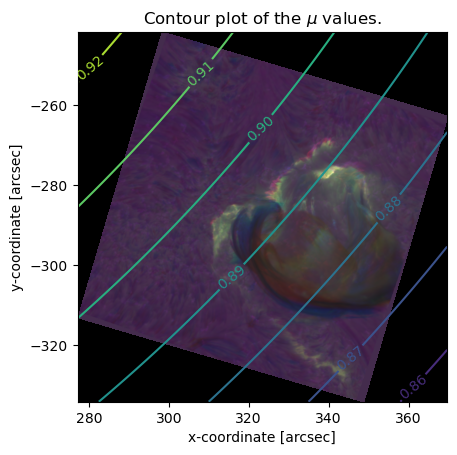

In [18]:



angle =  -25.5740/np.pi
frame = 0    

width = 60  * (np.abs(np.sin(angle)) + np.abs(np.cos(angle)))
fyp = [position[1] - width / 2, position[1] + width / 2 ]
fyp = [position[0] - width / 2, position[0] + width / 2, *fyp]
extent = fyp
xx, yy, MU = extent_to_grid(extent, Ha.shape, invert=False, angle=angle)
xx0=xx
yy0=yy

mu = give_mu_contourplot(
    MU,
    xx,
    yy,
    extent,
    over=Ha,
    save=True,
    save_name=Ha.name_of_line,
    timeFrame=frame,
    rotate=angle
)
sst_data = Ha
theor_line = theor_Ha
set_mu(Ha, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Ha.index_mu], theor_line.sst_clv[theor_Ha.index_mu][0], clv_fit(mu, theor_line)


[295.9, 350.9, -315.4, -260.4]


AttributeError: 'SST_data' object has no attribute 'current_ccp'

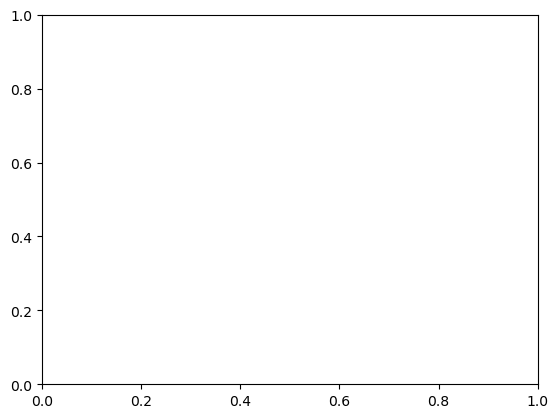

In [ ]:
# def calculate_mu(x,y, radius=959.63):
#     '''
#     Calculates mu given x,y in arseconds the radius of the celestial object is option. 
#     The value of the sun is 959.63 arcsec

#     mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
#     a spot at the celestial objec.
#     x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
#     of the celestial object.
#     '''
#     mu  = (1-(x**2 + y**2)/radius**2)**0.5
#     return mu

# width = 55

# fxp = [position[0] - width / 2, position[0] + width / 2 ]
# fyp = [position[1] - width / 2, position[1] + width / 2 ]
# fxp.extend(fyp)
# print(fxp)

# x = np.linspace(fxp[0], fxp[1], np.shape(Ha.datacube)[4])
# y = np.linspace(fyp[0], fyp[1], np.shape(Ha.datacube)[3])

# X, Y = np.meshgrid(x, y)

# MU = calculate_mu(X,Y)


# reload(un)

# def set_mu(sst_data, mu):
#     sst_data.mu = mu

# def fix_mu_theor(mu, theor_line):
#     x = np.abs(theor_line.sst_mu-mu)
#     index_mu = np.where(x == np.min(x))[0]
#     theor_line.index_mu = index_mu
#     theor_line.best_fit_clv = clv_fit(mu, theor_line)


# def clv_fit(mu, theor_line):
#     return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)


# def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
#     '''
#     Creates a contourplot of the mu values
#     if over is not None but a sst_data class object then the countour plot is shown over the specific frame
#     '''
#     if over is not None:
#         shape=np.shape(over.datacube)[3:5]

#     fig, ax = plt.subplots()
#     if over is not None:
#         over.xx, over.yy = X, Y
#         over.frame_integrated_spect(timeFrame)
#         ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
#         av_mu = np.average(MU, weights=over.boundary)
#         print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
#     CS = ax.contour(X, Y, MU)
#     ax.clabel(CS, inline=True, fontsize=10)
#     ax.set_title(r'Contour plot of the $\mu$ values.')
#     ax.set_xlabel('x-coordinate [arcsec]')
#     ax.set_ylabel('y-coordinate [arcsec]')

        
#     if save:
#         # Save arrays together
#         np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
#         print("succesfully saved.")
        
#     if over is not None:
#         return av_mu
    
# # un.give_mu_contourplot(Ha.filename, timeFrame=0, over=None, shift=(0,0), save=False, save_name=Ha.name_of_line)

# mu = give_mu_contourplot(MU, X, Y, fxp, over=Ha, save=True, save_name=Ha.name_of_line)
# print(np.shape(Ha.datacube))
# sst_data = Ha
# theor_line = theor_Ha
# set_mu(Ha, mu)
# # Ha.set_mu(theor_line=theor_Ha, number_of_last_frame=190)
# # mu = CaII.set_mu(theor_line=theor_CaII, number_of_last_frame=170)
# fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Ha.index_mu], theor_line.sst_clv[theor_Ha.index_mu][0], clv_fit(mu, theor_line)


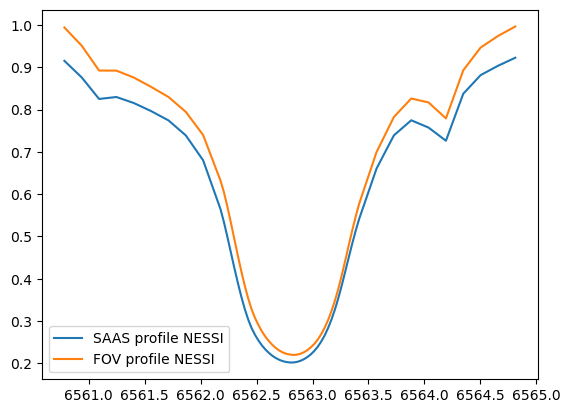

In [20]:
theor_Ha.set_fov( sst_data.xx, sst_data.yy, Ha.boundary, sr=959.63)

## Finding a suitable quiet sun patch

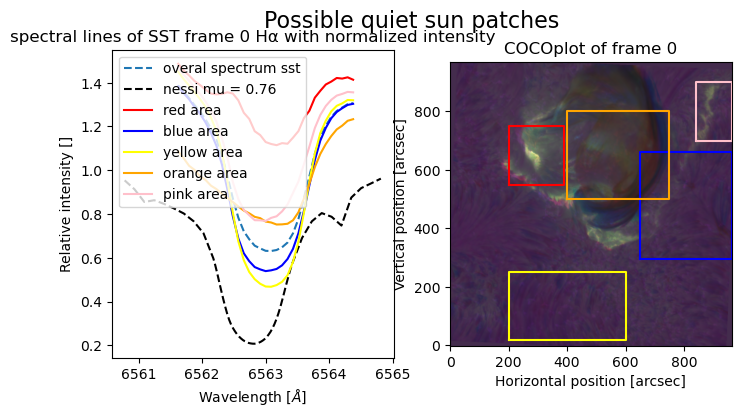

In [21]:
X = [[(200,390), (550,750)], [(650,963), (294,662)],[(200,600), (20,250)],[(400,750), (500,800)], [(840, 963), (700, 900)]]

frame = 0

Ha.possible_quiet_sun_patches(frame, theor_Ha , X=X)

### The Yellow patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [22]:
color_wanted_patch = 'yellow'

the edges of the patch are denoted by the xlim: (200, 600) and ylim: (20, 250)


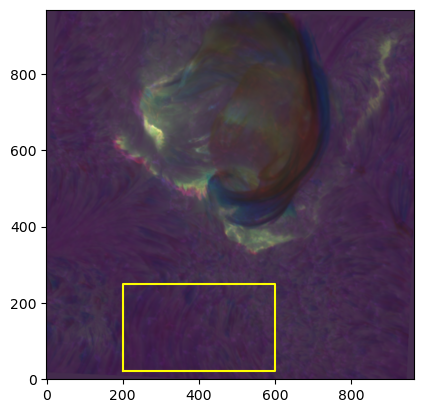

The quiet sun is pick at x (318.7167185877466, -307.7658410732714) with average              mu 0.8870379996947695
[[0.32025118 0.32031069 0.32037021 ... 0.34387897 0.34393848 0.343998  ]
 [0.32025118 0.32031069 0.32037021 ... 0.34387897 0.34393848 0.343998  ]
 [0.32025118 0.32031069 0.32037021 ... 0.34387897 0.34393848 0.343998  ]
 ...
 [0.32025118 0.32031069 0.32037021 ... 0.34387897 0.34393848 0.343998  ]
 [0.32025118 0.32031069 0.32037021 ... 0.34387897 0.34393848 0.343998  ]
 [0.32025118 0.32031069 0.32037021 ... 0.34387897 0.34393848 0.343998  ]] [[-0.32748539 -0.32748539 -0.32748539 ... -0.32748539 -0.32748539
  -0.32748539]
 [-0.32742625 -0.32742625 -0.32742625 ... -0.32742625 -0.32742625
  -0.32742625]
 [-0.3273671  -0.3273671  -0.3273671  ... -0.3273671  -0.3273671
  -0.3273671 ]
 ...
 [-0.31405895 -0.31405895 -0.31405895 ... -0.31405895 -0.31405895
  -0.31405895]
 [-0.3139998  -0.3139998  -0.3139998  ... -0.3139998  -0.3139998
  -0.3139998 ]
 [-0.31394066 -0.31394066 -0.3139

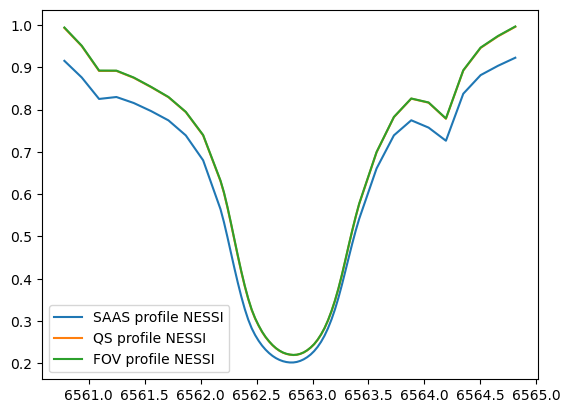

{'frame': 0, 'xlim': (200, 600), 'ylim': (20, 250), 'color': 'yellow'}

In [23]:
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']
ind = int(colors.index(color_wanted_patch))

xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

Ha.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)

theor_Ha.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
Ha.quiet_sun

[6561.62399995 6561.70999992 6561.79599988 6561.88199997 6561.96799994
 6562.05399996 6562.13999999 6562.22599995 6562.31199998 6562.39799994
 6562.48399997 6562.56999999 6562.65599999 6562.74199998 6562.82799999
 6562.914      6563.         6563.086      6563.17200001 6563.25800002
 6563.34400001 6563.43000001 6563.51600003 6563.60200006 6563.68800002
 6563.77400005 6563.86000001 6563.94600004 6564.03200006 6564.11800003
 6564.20400012 6564.29000008 6564.37600005] [1.45015994 1.41637861 1.3871988  1.35696715 1.32517982 1.2897965
 1.24066804 1.17877236 1.08193563 0.95176568 0.80527302 0.6754228
 0.58897776 0.53486958 0.50208696 0.48129063 0.46879353 0.46762717
 0.47523094 0.49008295 0.51998105 0.58120867 0.67511426 0.80569806
 0.94916786 1.07587782 1.17010439 1.22643878 1.26899183 1.29440008
 1.30563343 1.32110946 1.31985542] [0.84275773 0.82953841 0.8101546  0.78870436 0.7581465  0.71668642
 0.65677717 0.58296546 0.47837328 0.3782109  0.30741725 0.26553695
 0.23926786 0.22442001 0.219

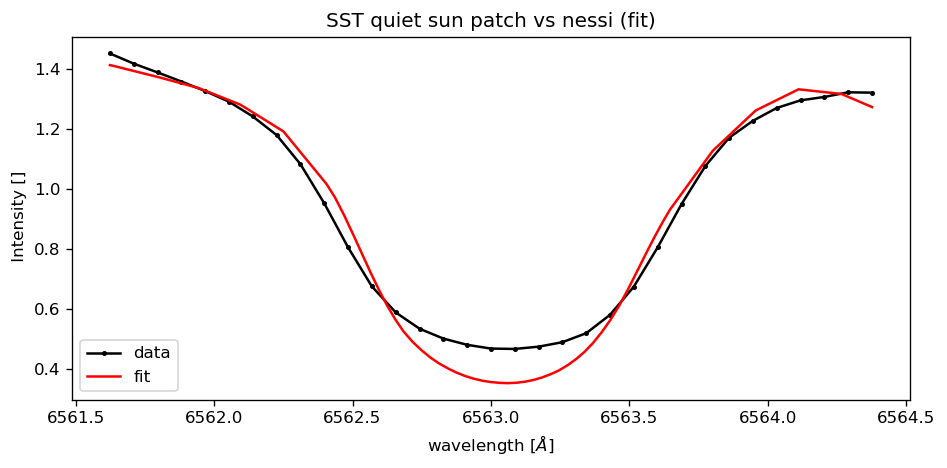

de p-waarde is  0.42508165847911183 
Chi^2 reduced= 31.82853958259692 
aantal vrijheidgraden= 31 
chi^2= 986.6847270605045
we behouden de fit tot op een betrouwbaarheidsniveau van  0.42508165847911183 
Oftewel verwerp als p-waarde <lpha-niveau 


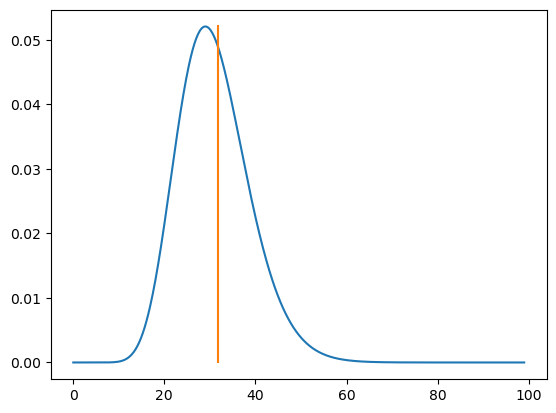

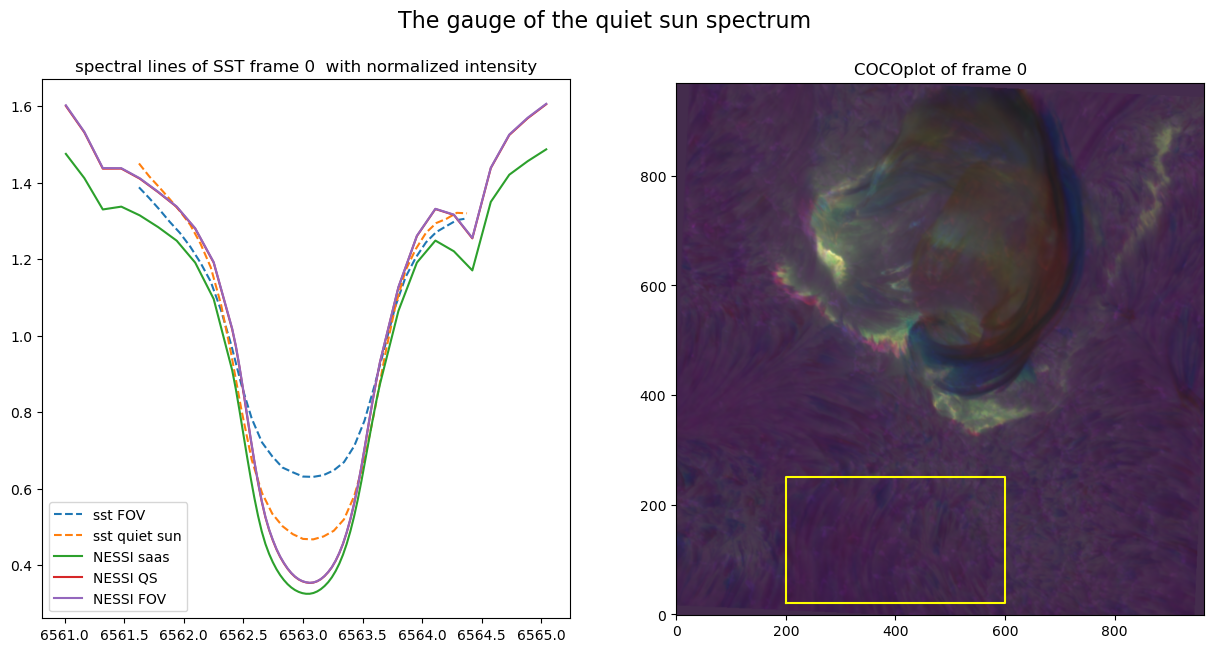

In [24]:
reload(un3)
un3.fit_qs_to_NESSI(theor_Ha, Ha)

[0.22852857735233054, 0, 1.6117488047238253]
[1.41264913 1.3932997  1.37335737 1.35197378 1.32738085 1.2959296
 1.25540125 1.20637422 1.1236596  1.02745962 0.88700619 0.71497193
 0.56572134 0.47066465 0.41242083 0.37620253 0.3580283  0.35505185
 0.36974228 0.40362256 0.4646468  0.56353875 0.70563356 0.86081725
 0.98490312 1.09375455 1.17871653 1.25298941 1.29596399 1.33092069
 1.32250995 1.30691073 1.2731792 ]


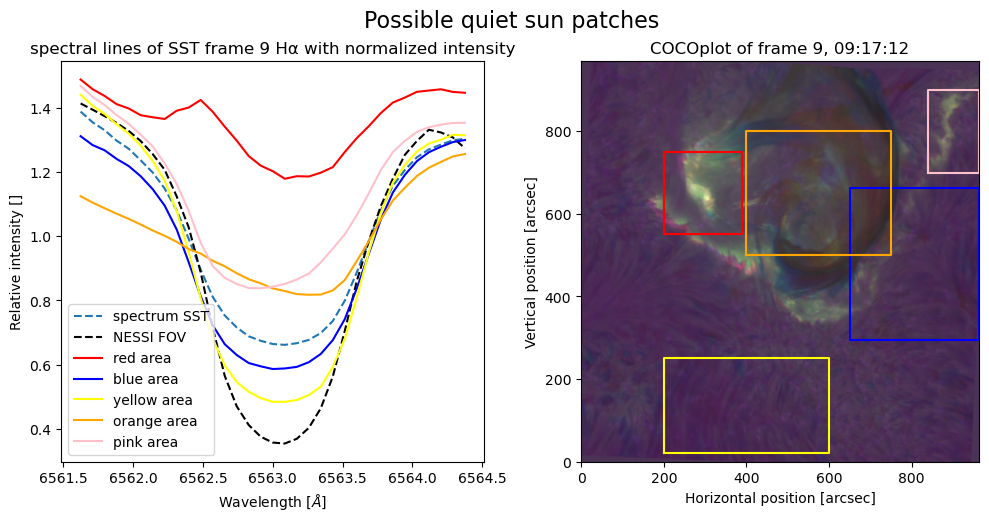

In [25]:
self = Ha
theor_line = theor_Ha
restrict_to_line = False
frame = 9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12, 5.2))

fig.suptitle('Possible quiet sun patches', fontsize=16)

self.ccp_frame(frame,Show=False)

colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']

ax[0].set_title(
    f"spectral lines of SST frame {str(frame)}"
    + " H\u03B1 with normalized intensity"
)
self.frame_integrated_spect(frame)
w= self._wavel
ax[0].plot(self._wavel, self.av_spect, '--', label='spectrum SST')

f_nessi_qs = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.spectr_qs 
                                , kind='linear', fill_value="extrapolate")
f_nessi_fov = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.spectr_fov 
                                , kind='linear', fill_value="extrapolate")

theta = self.theta_nessi_to_quiet_sun
print(theta)
print(f_nessi_fov(theta)(w))

ax[0].plot(w, f_nessi_fov(theta)(w), '--', label='NESSI FOV', color='black')

ax[1].imshow(self.current_ccp,origin='lower')
ax[1].set_title(f"COCOplot of frame {str(frame)}, {str(self._time[frame])[2:-5]}")
for t, i in enumerate(X):
    xlim=i[0]
    ylim=i[1]
    color = (
        colors[t]
        if t < len(colors)
        else np.array(np.random.choice(range(256), size=3)) / 255
    )
    ax[0].plot(
        self._wavel,
        self.frame_integrated_spect(frame, xlim=xlim, ylim=ylim),
        color=color,
        label=f'{str(color)} area',
    )
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[1].set_xlabel(r'Horizontal position [arcsec]')
ax[1].set_ylabel(r'Vertical position [arcsec]')        
ax[0].set_xlabel(r'Wavelength [$\AA$]')
ax[0].set_ylabel('Relative intensity []')
ax[0].legend()
if hasattr(self, 'line_lim') and restrict_to_line:
    ax[0].set_xlim(self.line_lim)

plt.show()

Assume now that the standard deviation is 0.2% of the spectrum than for the current flare to be detected as an increase in the H alpha line? 

## The full FOV integrated spectrum over time:

In [26]:
sst_data = Ha
np.shape(sst_data.datacube)

(504, 1, 33, 970, 964)

In [27]:
sst_data.calculate__FOV_spect_over_time()

In [28]:
sst_data.quiet_sun

{'frame': 0, 'xlim': (200, 600), 'ylim': (20, 250), 'color': 'yellow'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [16] at time t=[b'09:18:02 UT.
The SST data runs from t=09:15:54 UT to t=10:17:18 UT.
The areafactor for THIS flare is 0.001045605534651025 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 84.03%.


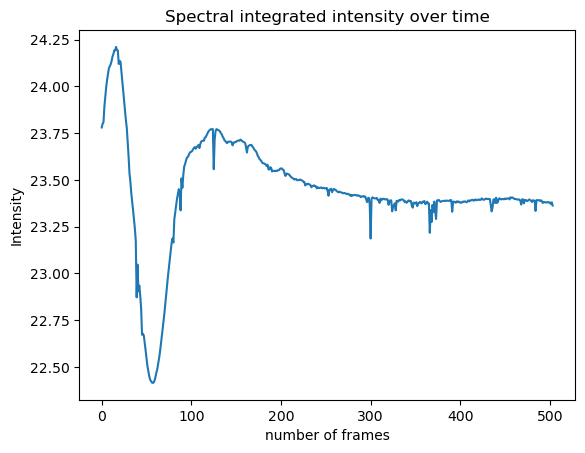

In [29]:
un.save_for_further_analysis(Ha, theor_Ha)


# Movie Making

[0.22852857735233054, 0, 1.6117488047238253]
Intensity limit calculation for first time.
Intensity limit is saved.
frame: 0, b'09:15:54.254', total number of frames: 504 


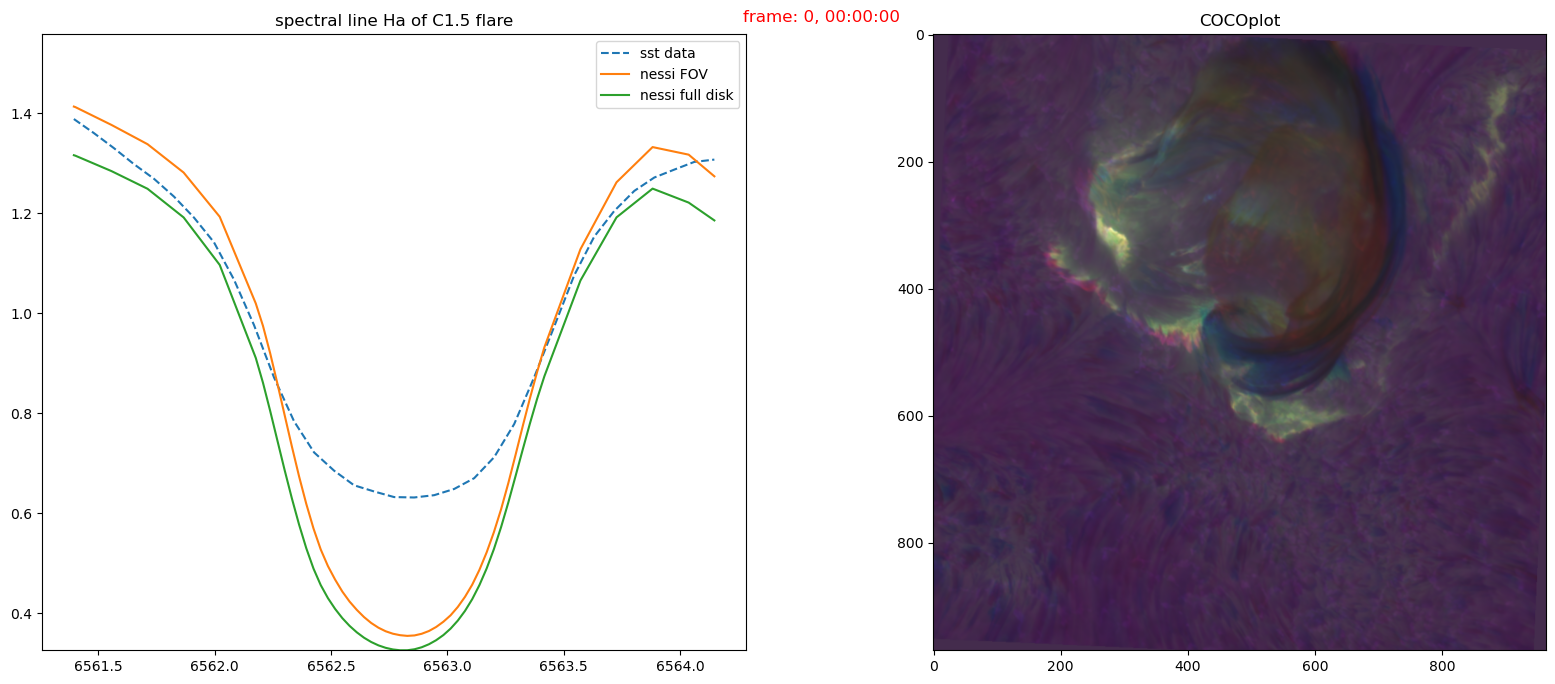

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 

In [31]:
# fill in here all arguments
theor_line = theor_line
sst_data = Ha
name_of_flare = "C1.5"
name_of_line = "Ha"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line)